In [ ]:
import serial
ser = serial.Serial('COM3', 115200, timeout=1)



38.2429594429394


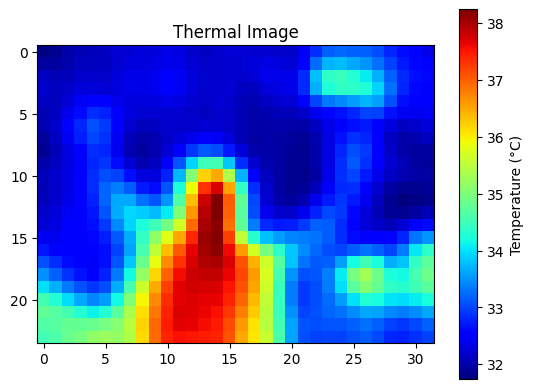

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Given temperature data as a string
data_str = """
23.59;23.88;24.04;24.27;23.84;24.27;24.47;24.11;24.26;24.26;24.57;24.37;24.04;24.07;24.09;24.38;24.29;24.22;23.89;24.13;23.96;24.28;24.65;25.16;24.98;24.92;25.37;24.99;24.50;24.44;24.58;24.02;23.89;23.50;23.91;23.94;24.18;23.92;23.86;24.09;24.53;23.92;24.24;24.18;24.52;23.88;24.48;24.02;24.30;24.03;24.79;24.48;23.98;24.07;25.18;25.38;25.58;24.81;25.04;25.26;25.36;24.55;24.61;24.49;24.49;24.11;24.29;24.24;24.68;23.48;25.22;24.50;24.25;24.48;24.55;24.78;23.92;24.15;24.13;24.06;24.20;24.18;24.69;24.50;23.97;24.05;27.16;27.49;27.14;26.91;26.48;25.72;24.45;24.99;24.75;24.79;24.40;23.66;24.04;24.28;24.06;23.89;24.04;24.43;24.21;24.32;25.04;24.54;24.16;24.27;24.26;24.59;24.24;23.62;24.37;24.58;24.37;24.25;27.02;27.49;27.31;27.25;27.06;26.99;25.49;24.53;24.59;24.29;24.47;23.73;24.62;24.22;24.94;24.06;24.40;24.10;24.52;24.12;24.18;24.64;23.91;24.10;24.15;24.44;23.66;24.03;24.25;24.08;24.15;24.03;24.97;24.68;24.79;25.17;25.90;26.15;25.01;24.08;24.63;24.39;23.82;23.81;24.14;24.65;24.36;25.87;24.48;24.14;24.29;24.14;24.05;24.08;24.30;23.94;24.23;24.14;24.15;23.80;23.90;24.23;24.27;23.65;24.26;24.54;24.37;23.93;24.80;25.25;24.53;24.60;24.63;24.54;24.27;24.15;25.09;24.24;27.32;23.84;24.51;24.21;23.90;24.45;24.31;24.19;23.98;24.25;24.22;24.27;24.09;23.99;24.02;23.91;23.80;24.11;24.01;24.21;24.67;23.83;25.07;24.04;23.91;23.75;24.12;24.22;23.53;24.37;23.99;25.41;23.83;26.89;23.75;24.05;24.07;23.57;24.23;24.10;24.50;23.90;24.33;24.16;23.97;23.64;24.14;24.01;24.04;23.64;23.49;24.53;24.21;26.36;24.16;25.27;23.83;23.81;24.00;24.40;23.54;23.81;24.86;23.54;26.28;23.57;24.08;23.80;23.67;23.96;24.21;24.34;23.85;25.80;24.67;24.26;23.97;23.92;24.08;23.94;23.72;23.61;24.26;23.89;25.93;23.70;26.46;23.61;23.87;23.57;24.14;23.59;23.94;24.06;23.89;24.85;23.51;27.12;23.82;24.12;23.84;23.88;24.59;24.02;28.15;24.11;26.11;25.73;23.92;23.76;23.97;24.17;23.84;23.96;23.93;24.05;23.69;27.96;23.52;25.22;24.60;24.52;23.41;23.82;24.30;24.13;24.85;23.86;25.87;23.77;26.26;24.02;23.94;24.12;24.18;26.43;25.19;31.17;31.92;27.01;26.56;23.77;24.06;24.01;23.56;23.68;23.83;23.86;26.57;23.75;25.29;23.79;23.86;23.99;24.54;24.16;23.72;24.35;23.97;24.73;24.43;26.45;24.36;26.37;24.15;23.90;25.31;24.48;31.04;27.39;30.69;31.08;23.80;25.06;23.89;24.12;23.91;23.90;23.54;24.48;23.61;26.55;23.89;24.68;23.62;24.12;23.42;23.99;24.19;23.72;24.72;23.94;25.21;24.01;28.05;24.48;25.75;24.54;24.76;27.30;26.57;32.26;32.42;28.37;28.57;23.78;24.15;23.66;23.87;23.51;25.03;23.77;26.67;23.73;24.39;23.97;23.75;23.27;23.92;23.54;24.12;24.43;24.17;24.85;24.18;25.41;24.57;28.37;24.68;26.06;25.43;24.91;31.51;28.64;30.28;32.61;24.05;25.06;23.77;24.13;23.65;24.07;24.04;26.78;24.19;25.44;23.67;24.60;23.45;23.66;23.48;24.15;24.05;24.35;24.70;24.66;24.55;24.31;26.79;24.47;28.58;24.64;28.19;26.39;27.23;31.43;31.61;27.61;25.63;24.29;24.83;23.84;25.55;23.83;27.18;23.84;25.41;23.64;24.28;23.85;24.10;23.95;24.81;24.25;24.56;23.80;24.43;24.99;24.36;24.82;24.38;26.14;25.12;28.86;27.40;28.62;31.39;29.38;31.17;31.26;25.29;26.19;23.85;27.30;23.59;27.35;23.94;27.11;24.30;24.77;24.14;24.39;24.03;24.47;25.61;25.40;24.74;24.42;24.65;24.28;24.40;24.72;24.55;24.70;26.56;27.76;28.20;29.68;29.25;30.05;30.51;29.72;29.77;27.98;28.85;24.63;28.16;23.98;26.03;23.93;24.36;24.40;24.82;24.82;24.63;24.82;27.75;26.74;25.36;24.66;24.50;24.55;24.18;24.26;25.18;25.59;27.74;27.12;29.36;28.71;30.18;29.86;30.36;30.39;28.19;29.87;26.65;29.14;23.99;26.46;24.48;25.21;25.27;26.58;27.29;27.34;24.70;25.23;26.88;26.87;25.50;25.40;24.53;24.35;24.24;24.44;25.33;25.79;26.57;28.62;28.99;30.39;29.76;30.01;29.59;29.97;29.34;28.65;28.02;25.99;24.86;24.42;25.44;24.76;26.50;28.42;28.73;27.88;25.38;25.98;26.78;26.92;26.44;24.84;25.19;25.11;24.92;24.51;25.56;25.89;28.84;28.01;29.52;29.86;29.93;29.47;29.91;29.72;28.51;29.42;27.97;26.77;24.48;24.65;25.02;25.30;26.00;27.54;27.71;27.23;26.40;26.91;26.55;27.64;26.40;27.58;25.06;26.33;24.30;25.56;25.29;27.80;27.88;28.83;29.77;29.66;29.77;29.30;30.08;29.43;29.63;28.11;26.80;27.38;24.48;24.46;25.47;24.79;24.97;25.50;26.31;26.04;26.03;26.36;25.85;26.07;28.06;25.51;28.74;24.67;26.86;24.66;28.52;26.03;28.88;28.30;29.61;30.01;29.67;29.43;29.65;29.73;27.95;28.82;28.80;25.44;25.22;24.51;24.67;26.36;24.62;25.90;25.46;25.86;25.12;24.95;25.24;25.97;25.52;28.04;25.14;29.42;25.28;29.21;25.71;28.16;28.26;29.41;29.60;30.27;29.78;29.75;29.74;28.91;28.74;28.44;25.68;28.00;25.41;24.82;25.50;24.77;25.43;24.35;25.60;24.90;24.88;24.17;25.11;24.88;27.02;25.32;28.50;24.98;28.77;26.60;27.76;26.02;28.73;28.45;30.04;29.14;29.31;29.16;29.60;29.59;28.09;27.38;29.82;25.41;25.53;24.68;24.73;25.38;24.20;25.60;25.08;25.22;24.35;24.88;24.79;25.02
"""

# Parse the data
data_list = list(map(float, data_str.split(';')))

# Filter out zero values and reshape to a 2D array (24x32 for MLX90640 sensor)
data_array = np.array(data_list).reshape((24, 32)) + 8

# normalize the data
# data_array = (data_array - np.min(data_array)) / (np.max(data_array) - np.min(data_array))

# add padding and gausian filter 5x5
# Apply Gaussian filter with a 5x5 kernel
filtered_data_array = gaussian_filter(data_array, sigma=1)

# Normalize the filtered data array again if needed
# filtered_data_array = (filtered_data_array - np.min(filtered_data_array)) / (np.max(filtered_data_array) - np.min(filtered_data_array))

# add 6 to each value to get the correct temperature
print(max(filtered_data_array.flatten()))

# Plot the thermal image
plt.imshow(filtered_data_array, cmap='jet', interpolation='nearest')
plt.colorbar(label='Temperature (°C)')
plt.title('Thermal Image')
plt.show()
